<a href="https://colab.research.google.com/github/Narendra13512u/Analysis-of-Draught-Monitoring-System/blob/main/P_title_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

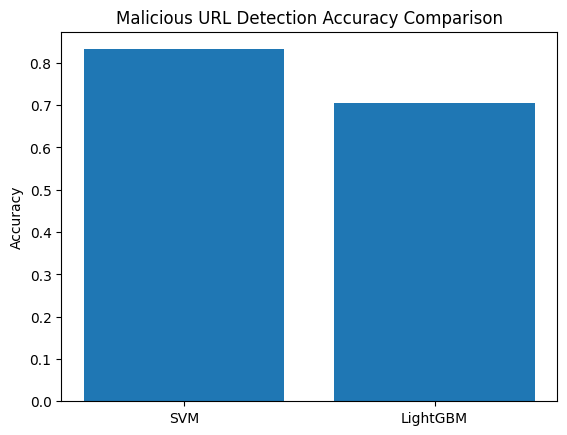

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url_data = pd.read_csv("/content/dataset.csv")

# Split the dataset into features and labels
X = url_data['url']
y = url_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the URLs using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train and evaluate SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train and evaluate LightGBM
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train_tfidf, y_train)
lgb_predictions = lgb_classifier.predict(X_test_tfidf)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)

# Display accuracy results
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"LightGBM Accuracy: {lgb_accuracy * 100:.2f}%")

# Create a bar chart to compare accuracies
labels = ['SVM', 'LightGBM']
accuracies = [svm_accuracy, lgb_accuracy]

plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Malicious URL Detection Accuracy Comparison')
plt.show()